# CCT College

###### Module Title(s):	
Artificial Inteligence, Data Visualisation & Comms 
###### Lecturer Name(s):	
David McQuaid, Sam Weiss
###### Assessment Title:	
AI_DV _Lv8_ICA_v5
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
5th January 2024

###### GitHub:	
https://github.com/tamirisrd/AI_DV_ICA

# Artificial Intelligence

Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:

2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.
Assume that if a person has two abilities, he or she can take on two roles in the company.

So Ciara narrowed down her selections to the following people:

Name 	Abilities
Peter 	Python and AI
Juan 	Web and AI
Jim 	AI and Systems
Jane 	Python and Database
Mary 	Web and Systems
Bruce 	Systems and Python
Anita 	Web and AI




## Scenario 1
#### Suppose Ciara knows Python, and only has funds to hire three more people.


In [1]:
!pip install python-constraint

In [2]:
from constraint import Problem

In [54]:
# variables and domains
roles = [
    'PP_1',
    'PP_2',
    'AI_1',
    'AI_2',
    'WD',
    'DB',
    'SE']

people = {
    'Ciara': ["PP_1"],
    'Peter': ["PP_2", "AI_1", "AI_2"], 
    'Juan': ["WD", "AI_1", "AI_2"], 
    'Jim': ["AI_1", "AI_2","SE"], 
    'Jane':["PP_2", "DB"], 
    'Mary':["WD", "SE"], 
    'Bruce':["PP_2", "SE"], 
    'Anita':["AI_1", "AI_2","WD"]}

problem = Problem()

# Define the variables and domains
for role in roles:
    problem.addVariable(role, list(people.keys()))

# Define constraints
def ciara_cons(PP_1):
    return PP_1 == "Ciara"

def AI_cons (AI_1, AI_2):
    return AI_1 != AI_2

def db_cons(DB):
    return DB == "Jane"

def two_roles_cons(*roles):
    people_count = dict()
    for role in roles:
        if role in people_count:
            people_count[role] += 1
        else:
            people_count[role] = 1
    return all(count <= 2 for count in people_count.values())

def skill_cons(*args):
    for role_arg, people_arg in zip(roles, args):  
        if role_arg not in people[people_arg]:
            return False
    return True
    
def hiring_cons(*roles):
    return len(set(roles)) == 4
    
problem.addConstraint(ciara_cons, ["PP_1"])    
problem.addConstraint(AI_cons, ["AI_1", "AI_2"])
problem.addConstraint(db_cons, ["DB"])
problem.addConstraint(two_roles_cons, roles)
problem.addConstraint(skill_cons, roles)
problem.addConstraint(hiring_cons, roles)

# Solution
solutions = problem.getSolutions()

for solution in solutions:
    for role, person in solution.items():
        if person:
            print(f"{role}: {person}")
    print()     

AI_1: Anita
AI_2: Jim
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Anita

AI_1: Jim
AI_2: Anita
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Anita

AI_1: Jim
AI_2: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Juan

AI_1: Juan
AI_2: Jim
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Juan



## Scenario 2
#### Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.

In [56]:
# variables and domains
roles = [
    'PP_1',
    'PP_2',
    'AI_1',
    'AI_2',
    'AI_3',
    'WD',
    'DB',
    'SE']

people = {
    'Ciara': ["PP_1"],
    'Peter': ["PP_2", "AI_1", "AI_2", "AI_3"], 
    'Juan': ["WD", "AI_1", "AI_2","AI_3"], 
    'Jim': ["AI_1", "AI_2", "AI_3", "SE"], 
    'Jane':["PP_2", "DB"], 
    'Mary':["WD", "SE"], 
    'Bruce':["PP_2", "SE"], 
    'Anita':["AI_1", "AI_2", "AI_3", "WD"]}

problem = Problem()

# Define the variables and domains
for role in roles:
    problem.addVariable(role, list(people.keys()))

# Define constraints
def ciara_cons(PP_1):
    return PP_1 == "Ciara"

def python_cons(PP_1, PP_2):
    return PP_1 != PP_2

def AI_cons (AI_1, AI_2, AI_3):
     return AI_1 != AI_2 and AI_1 != AI_3 and AI_2 != AI_3 
    
def db_cons(DB):
    return DB == "Jane"

# changed to Ciara and Juan hiring 4 more people
def hiring_cons(*args):
    people_set = set(args)
    if "Ciara" in people_set and "Juan" in people_set:
        return len(people_set) <= 6
    if "Ciara" in people_set and "Juan" in people_set:
        return len(people_set) <= 5
    else:
        return len(people_set) == 4

def skill_cons(*args):
    for role_arg, people_arg in zip(roles, args):  
        if role_arg not in people[people_arg]:
            return False
    return True

# A person can only take to positions
def two_roles_cons(*roles):
    people_count = dict()
    for role in roles:
        if role in people_count:
            people_count[role] += 1
        else:
            people_count[role] = 1
    return all(count <= 2 for count in people_count.values())
    
problem.addConstraint(ciara_cons, ["PP_1"])    
problem.addConstraint(AI_cons, ["AI_1", "AI_2", "AI_3"])
problem.addConstraint(db_cons, ["DB"])
problem.addConstraint(skill_cons, roles)
problem.addConstraint(hiring_cons, roles)
problem.addConstraint(two_roles_cons, roles)

# Solution
solutions2 = problem.getSolutions()

if solutions2:
    for solution in solutions2:
        for role, person in solution.items():
            if person: 
                print(f"{role}: {person}")
        print()
                
else: 
    print("No solutions found")

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Bruce
SE: Bruce
WD: Anita

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Bruce
SE: Bruce
WD: Juan

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Bruce
SE: Jim
WD: Anita

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Bruce
SE: Jim
WD: Juan

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Bruce
WD: Anita

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Bruce
WD: Juan

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Mary
WD: Mary

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Mary
WD: Anita

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Mary
WD: Juan

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Mary

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE: Jim
WD: Anita

AI_1: Anita
AI_2: Jim
AI_3: Juan
DB: Jane
PP_1: Ciara
PP_2: Jane
SE

# Data Visualisation

## Scenario 1

In [50]:
import matplotlib.pyplot as plt

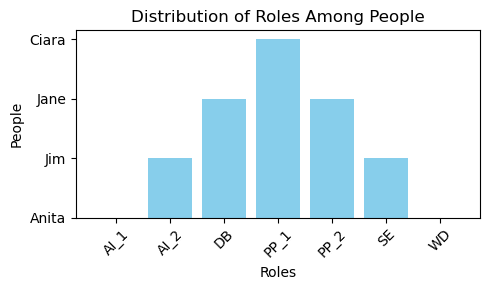

In [58]:
# Extract roles and people
roles = list(solutions[0].keys())
people = list(solutions[0].values())

# Create a bar chart
plt.figure(figsize=(5, 3))
plt.bar(roles, people, color='skyblue')
plt.xlabel('Roles')
plt.ylabel('People')
plt.title('Distribution of Roles Among People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

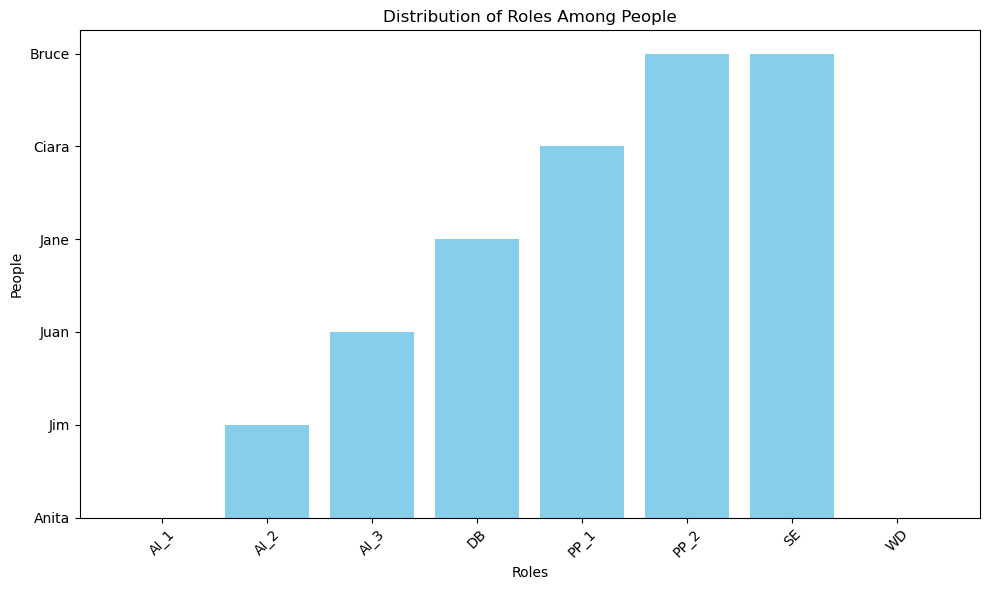

In [59]:
# Extract roles and people
roles = list(solutions2[0].keys())
people = list(solutions2[0].values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(roles, people, color='skyblue')
plt.xlabel('Roles')
plt.ylabel('People')
plt.title('Distribution of Roles Among People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## GUI

In [44]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg